In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
#import dataset and features

usecols = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income', 'median_house_value', 'ocean_proximity']

data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv', usecols=usecols)

In [4]:
print(data.shape)

(20640, 10)


In [5]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [7]:
#Data preparation
data.describe(include=["O"])

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [19]:
#Data preparation #pandas

data["rooms_per_household"] = data["total_rooms"] / data["households"]
# print(data["rooms_per_household"])
data["bedrooms_per_room"] = data["total_bedrooms"] / data["total_rooms"]
# print(data["bedrooms_per_room"])
data["population_per_household"] = data["population"] / data["households"]
print(data["population_per_household"])


0        2.555556
1        2.109842
2        2.802260
3        2.547945
4        2.181467
           ...   
20635    2.560606
20636    3.122807
20637    2.325635
20638    2.123209
20639    2.616981
Name: population_per_household, Length: 20640, dtype: float64


In [20]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [22]:
#Question 1
data["ocean_proximity"].mode()

0    <1H OCEAN
dtype: object

In [26]:
#Question 2
data_numeric = data.copy()
data_numeric = data.drop(["ocean_proximity", "median_house_value"], axis=1)
data_numeric.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,5.429000,0.213039,3.070655
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,2.474173,0.057983,10.386050
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.846154,0.100000,0.692308
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,4.440716,0.175427,2.429741
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,5.229129,0.203162,2.818116
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,6.052381,0.239821,3.282261
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,141.909091,1.000000,1243.333333


In [27]:
data_numeric.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.027540,0.092657,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,0.106389,-0.113815,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,-0.153277,0.136089,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.133798,-0.187900,-0.024581
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.001538,0.084238,-0.028355
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.072213,0.035319,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,-0.080598,0.065087,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.326895,-0.615661,0.018766
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.001538,-0.072213,-0.080598,0.326895,1.000000,-0.416952,-0.004852
bedrooms_per_room,0.092657,-0.113815,0.136089,-0.187900,0.084238,0.035319,0.065087,-0.615661,-0.416952,1.000000,0.002938


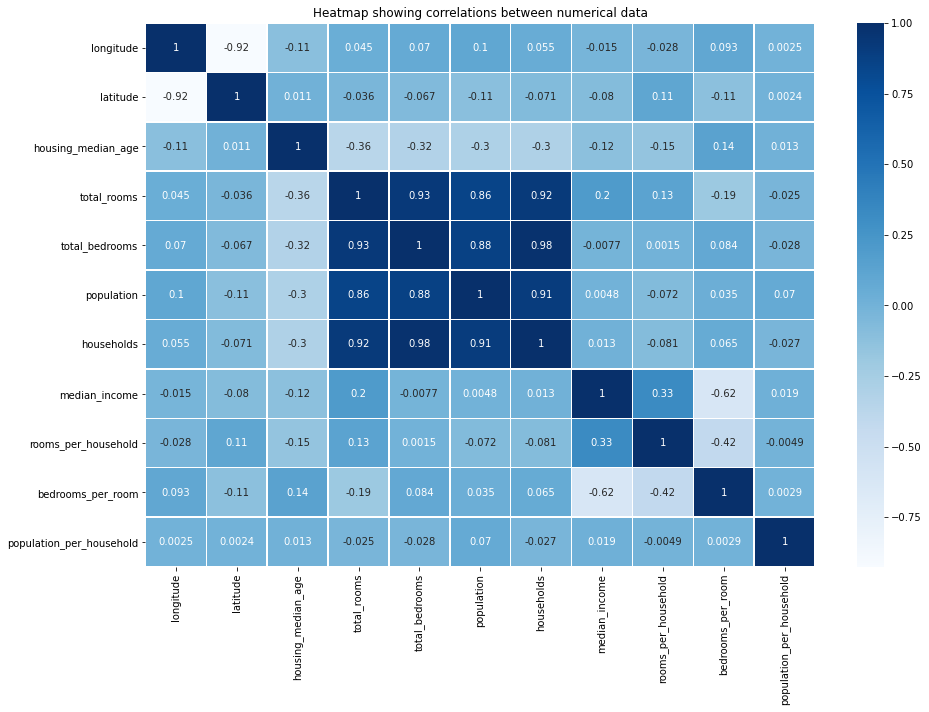

In [32]:
plt.figure(figsize=(15,10))  
sns.heatmap(data_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [84]:
data_numeric.corr().unstack().sort_values(ascending = False)

longitude            longitude              1.000000
latitude             latitude               1.000000
bedrooms_per_room    bedrooms_per_room      1.000000
rooms_per_household  rooms_per_household    1.000000
median_income        median_income          1.000000
                                              ...   
rooms_per_household  bedrooms_per_room     -0.416952
bedrooms_per_room    median_income         -0.615661
median_income        bedrooms_per_room     -0.615661
longitude            latitude              -0.924664
latitude             longitude             -0.924664
Length: 121, dtype: float64

In [85]:
data_class = data.copy()
mean = data_class["median_house_value"].mean()

data_class["above_average"] = np.where(data_class["median_house_value"]>=mean,1,0)

In [86]:
#Split the data

data_class = data_class.drop("median_house_value" , axis=1)

In [87]:
#Split the data

from sklearn.model_selection import train_test_split

In [88]:
#Split the data

df_train_full, df_test = train_test_split(data_class, test_size=0.2, random_state=42)

In [89]:
#Split the data

df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [90]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [91]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [92]:
#Question 3

#Mutual information

from sklearn.metrics import mutual_info_score


In [93]:
cat = ['ocean_proximity']

In [94]:
def calculate_mu(series):
    return mutual_info_score(series, df_train.above_average)

df_mu = df_train[cat].apply(calculate_mu)
df_mu = df_mu.sort_values(ascending=False).to_frame(name='MU')

In [95]:
round(df_mu, 2)

,MU
ocean_proximity,0.1


In [96]:
#Question 4

df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

In [97]:
#Question 4
#Classification and accuracy of a model

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [99]:
num = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']                                      

In [100]:
train_dict = df_train[cat + num].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [103]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.84


In [104]:
#Question 5

features = cat + num
features


['ocean_proximity',
 'longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

In [109]:
orig_score = accuracy


for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

ocean_proximity 0.01974806201550383 0.8202519379844961
longitude 0.005697674418604581 0.8343023255813954
latitude 0.00642441860465115 0.8335755813953488
housing_median_age 0.00981589147286821 0.8301841085271318
total_rooms 0.002548449612403081 0.8374515503875969
total_bedrooms 0.0015794573643410637 0.8384205426356589
population 0.013691860465116279 0.8263081395348837
households 0.005939922480620141 0.8340600775193798
median_income 0.053420542635658874 0.7865794573643411
rooms_per_household 0.005697674418604581 0.8343023255813954
bedrooms_per_room 0.004001937984496107 0.8359980620155039
population_per_household 0.0006104651162790464 0.8393895348837209


In [110]:
#Question 6

data['median_house_value']=np.log1p(data['median_house_value'])

In [111]:
df_train_full, df_test = train_test_split(data, test_size=0.2, random_state=42)

In [112]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [113]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [114]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [115]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [116]:
#Ridge regression

train_dict = df_train[cat + num].to_dict(orient='records')

In [117]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [118]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [121]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 3))

0 0.524
0.01 0.524
0.1 0.524
1 0.524
10 0.524
